In [1]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import(
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score
)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fch = fetch_california_housing()
X = fch.data
y = fch.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
krr = KernelRidge(kernel = 'rbf', alpha=0.1, gamma=0.1)
krr.fit(X_train, y_train)

KernelRidge(alpha=0.1, gamma=0.1, kernel='rbf')

In [8]:
y_pred = krr.predict(X_test)

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [10]:
print(f"MAE:{mae:.2f}")
print(f"MSE:{mse:.2f}")
print(f"RMSE:{rmse:.2f}")
print(f"R2:{r2:.2f}")
print(f"EVS:{evs:.2f}")

MAE:0.40
MSE:0.32
RMSE:0.57
R2:0.75
EVS:0.75


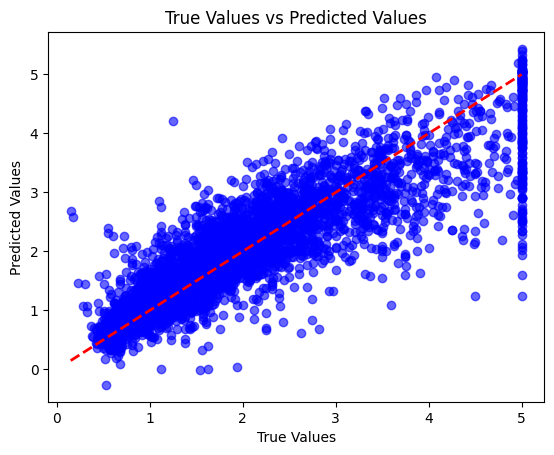

In [11]:
plt.scatter(y_test, y_pred, color='blue', alpha = 0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw =2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()